In [3]:
import pandas as pd
import numpy as np
import os 
import statistics 
from pathlib import Path
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import math
from statsmodels.stats.anova import AnovaRM
from numpy import mean, std, cov
from numpy.random import seed, randn
import random as rd
#from sklearn import preprocessing
#from sklearn import datasets
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
from __future__ import division
import sys
import scipy
from math import sqrt
import scipy.stats as stats
from scipy import stats 
from scipy.stats import t, pearsonr, sem, spearmanr
import seaborn as sns
from statistics import mean, stdev
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import pingouin as pg
from pingouin import ttest
from scipy.special import logsumexp

In [15]:
current_dir = os.getcwd()
shortformdata = pd.read_csv('shortformdata.csv')
longformdata = pd.read_csv('longformdata.csv')
shortformdata['prop_nonsocialchoice'] = abs(shortformdata['prop_socialchoice'] - 1)
display(shortformdata)
longformdata['prop_nonsocialchoice'] = abs(longformdata['prop_socialchoice'] - 1)
display(longformdata)


,participant,condition_recode,salience_mean,choice,stress_mean,stress_mean.1,rej-acc,ifnegvalue,choicertmean,timebetween,...,overall_decisionprice_social,overall_decisionprice_nonsocial,decision_price,overall_prop_social_choice,social_price,nonsocial_price,value_diff,social_decisionprice_total,nonsocial_decisionprice_total,prop_nonsocialchoice
0,59d5888d21977e0001d630f3,1,2.0,1.380000,7.0,7.0,-1.0,NaN,1.240000,1.0,...,0.023077,0.022917,NaN,0.520000,NaN,NaN,NaN,0.60,0.60,0.480000
1,59d5888d21977e0001d630f3,2,3.5,1.420000,8.0,8.0,-1.0,NaN,0.880000,1.0,...,0.023077,0.022917,NaN,0.520000,NaN,NaN,NaN,0.60,0.50,0.480000
2,5a09ebdf087f2e0001eae39f,1,2.5,1.580000,2.0,2.0,-1.0,NaN,1.980000,4.0,...,0.029206,0.032162,NaN,0.630000,NaN,NaN,NaN,0.85,0.67,0.420000
3,5a09ebdf087f2e0001eae39f,2,3.5,1.520000,3.0,3.0,-1.0,NaN,1.260000,4.0,...,0.029206,0.032162,NaN,0.630000,NaN,NaN,NaN,0.99,0.52,0.320000
4,5c5c451500b69200011bb8bf,1,1.5,1.340000,5.0,5.0,1.5,NaN,1.220000,3.0,...,0.030312,0.032500,NaN,0.640000,NaN,NaN,NaN,0.99,0.62,0.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,6711f493bfc7c4e11953872d,2,3.5,1.367347,4.0,4.0,3.0,NaN,1.020408,1.0,...,0.028103,0.025610,NaN,0.585859,NaN,NaN,NaN,0.88,0.48,0.387755
192,671469967e2a4f2e612e3846,1,2.0,1.520000,5.0,5.0,-2.5,NaN,1.240000,1.0,...,0.021556,0.022963,NaN,0.454545,NaN,NaN,NaN,0.43,0.68,0.620000
193,671469967e2a4f2e612e3846,2,4.0,1.551020,7.5,7.5,-2.5,NaN,1.326531,1.0,...,0.021556,0.022963,NaN,0.454545,NaN,NaN,NaN,0.54,0.56,0.469388
194,6722ca2b1f3ebd2d544608c3,1,1.5,1.480000,4.0,4.0,-2.5,NaN,1.040000,1.0,...,0.022800,0.022200,NaN,0.500000,NaN,NaN,NaN,0.58,0.57,0.500000


,participant,condition_recode,salience_mean,choice,stress_mean,stress_mean.1,rej-acc,ifnegvalue,choicertmean,timebetween,...,overall_decisionprice_social,overall_decisionprice_nonsocial,decision_price,overall_prop_social_choice,social_price,nonsocial_price,value_diff,social_decisionprice_total,nonsocial_decisionprice_total,prop_nonsocialchoice
0,59d5888d21977e0001d630f3,1,2.0,1.38,7.0,7.0,-1.0,NaN,1.24,1.0,...,0.023077,0.022917,0.01,0.52,0.01,0.01,0.00,0.60,0.60,0.48
1,59d5888d21977e0001d630f3,1,2.0,1.38,7.0,7.0,-1.0,NaN,1.24,1.0,...,0.023077,0.022917,0.02,0.52,0.02,0.01,0.01,0.60,0.60,0.48
2,59d5888d21977e0001d630f3,1,2.0,1.38,7.0,7.0,-1.0,NaN,1.24,1.0,...,0.023077,0.022917,0.03,0.52,0.01,0.03,-0.02,0.60,0.60,0.48
3,59d5888d21977e0001d630f3,1,2.0,1.38,7.0,7.0,-1.0,NaN,1.24,1.0,...,0.023077,0.022917,0.04,0.52,0.04,0.01,0.03,0.60,0.60,0.48
4,59d5888d21977e0001d630f3,1,2.0,1.38,7.0,7.0,-1.0,NaN,1.24,1.0,...,0.023077,0.022917,0.05,0.52,0.05,0.01,0.04,0.60,0.60,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9549,6722ca2b1f3ebd2d544608c3,2,3.5,1.48,6.5,6.5,-2.5,NaN,0.74,1.0,...,0.022800,0.022200,0.01,0.50,0.01,0.05,-0.04,0.56,0.54,0.50
9550,6722ca2b1f3ebd2d544608c3,2,3.5,1.48,6.5,6.5,-2.5,NaN,0.74,1.0,...,0.022800,0.022200,0.02,0.50,0.05,0.02,0.03,0.56,0.54,0.50
9551,6722ca2b1f3ebd2d544608c3,2,3.5,1.48,6.5,6.5,-2.5,NaN,0.74,1.0,...,0.022800,0.022200,0.03,0.50,0.03,0.05,-0.02,0.56,0.54,0.50
9552,6722ca2b1f3ebd2d544608c3,2,3.5,1.48,6.5,6.5,-2.5,NaN,0.74,1.0,...,0.022800,0.022200,0.04,0.50,0.05,0.04,0.01,0.56,0.54,0.50


In [16]:
shortformdata['prop_difference']= 1- shortformdata['prop_socialchoice']
print(shortformdata['prop_difference'])

longformdata['prop_difference']= 1- longformdata['prop_socialchoice']
print(longformdata['prop_difference'])

#create sepeate variables with values for within each condition
rej = shortformdata.loc[shortformdata['condition_recode']==1].reset_index(drop=True)
acc = shortformdata.loc[shortformdata['condition_recode']==2].reset_index(drop=True)

rej_long = longformdata.loc[longformdata['condition_recode']==1].reset_index(drop=True)
acc_long = longformdata.loc[longformdata['condition_recode']==2].reset_index(drop=True)

notaffected = shortformdata.loc[shortformdata['rej-acc']<0].reset_index(drop=True)


#display(len(rej))
#display(len(acc))
#print(len(aq))
print(len(notaffected))
print(len(shortformdata))

0      0.480000
1      0.480000
2      0.420000
3      0.320000
4      0.340000
         ...   
191    0.387755
192    0.620000
193    0.469388
194    0.500000
195    0.500000
Name: prop_difference, Length: 196, dtype: float64
0       0.48
1       0.48
2       0.48
3       0.48
4       0.48
        ... 
9549    0.50
9550    0.50
9551    0.50
9552    0.50
9553    0.50
Name: prop_difference, Length: 9554, dtype: float64
94
196


In [7]:
display(rej)

,participant,condition_recode,salience_mean,choice,stress_mean,stress_mean.1,rej-acc,ifnegvalue,choicertmean,timebetween,...,overall_decisionprice_nonsocial,decision_price,overall_prop_social_choice,social_price,nonsocial_price,value_diff,social_decisionprice_total,nonsocial_decisionprice_total,prop_nonsocialchoice,prop_difference
0,59d5888d21977e0001d630f3,1,2.0,1.38,7.0,7.0,-1.0,NaN,1.24,1.0,...,0.022917,NaN,0.520000,NaN,NaN,NaN,0.60,0.60,0.48,0.48
1,5a09ebdf087f2e0001eae39f,1,2.5,1.58,2.0,2.0,-1.0,NaN,1.98,4.0,...,0.032162,NaN,0.630000,NaN,NaN,NaN,0.85,0.67,0.42,0.42
2,5c5c451500b69200011bb8bf,1,1.5,1.34,5.0,5.0,1.5,NaN,1.22,3.0,...,0.032500,NaN,0.640000,NaN,NaN,NaN,0.99,0.62,0.34,0.34
3,5c9d004ee3b6c40015254526,1,2.5,1.46,3.5,3.5,0.5,NaN,2.12,3.0,...,0.023191,NaN,0.530000,NaN,NaN,NaN,0.55,0.58,0.50,0.50
4,5cc3f0f9fdb33500018c5eeb,1,2.0,1.50,7.0,7.0,-1.5,NaN,0.72,2.0,...,0.023818,NaN,0.444444,NaN,NaN,NaN,0.61,0.50,0.46,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,67094d6215b6d0fe3e8c3e39,1,2.0,1.46,9.0,9.0,2.5,NaN,1.08,3.0,...,0.039394,NaN,0.670000,NaN,NaN,NaN,1.24,0.66,0.36,0.36
94,670d326c55fa3d6f10ebe253,1,2.0,1.42,6.0,6.0,-1.0,NaN,1.70,1.0,...,0.025455,NaN,0.560000,NaN,NaN,NaN,0.85,0.55,0.44,0.44
95,6711f493bfc7c4e11953872d,1,2.0,1.42,7.0,7.0,3.0,NaN,2.00,1.0,...,0.025610,NaN,0.585859,NaN,NaN,NaN,0.75,0.57,0.44,0.44
96,671469967e2a4f2e612e3846,1,2.0,1.52,5.0,5.0,-2.5,NaN,1.24,1.0,...,0.022963,NaN,0.454545,NaN,NaN,NaN,0.43,0.68,0.62,0.62


In [8]:
display(acc)

,participant,condition_recode,salience_mean,choice,stress_mean,stress_mean.1,rej-acc,ifnegvalue,choicertmean,timebetween,...,overall_decisionprice_nonsocial,decision_price,overall_prop_social_choice,social_price,nonsocial_price,value_diff,social_decisionprice_total,nonsocial_decisionprice_total,prop_nonsocialchoice,prop_difference
0,59d5888d21977e0001d630f3,2,3.5,1.420000,8.0,8.0,-1.0,NaN,0.880000,1.0,...,0.022917,NaN,0.520000,NaN,NaN,NaN,0.60,0.50,0.480000,0.480000
1,5a09ebdf087f2e0001eae39f,2,3.5,1.520000,3.0,3.0,-1.0,NaN,1.260000,4.0,...,0.032162,NaN,0.630000,NaN,NaN,NaN,0.99,0.52,0.320000,0.320000
2,5c5c451500b69200011bb8bf,2,3.0,1.380000,3.5,3.5,1.5,NaN,1.540000,3.0,...,0.032500,NaN,0.640000,NaN,NaN,NaN,0.95,0.55,0.380000,0.380000
3,5c9d004ee3b6c40015254526,2,3.5,1.480000,3.0,3.0,0.5,NaN,2.280000,3.0,...,0.023191,NaN,0.530000,NaN,NaN,NaN,0.62,0.51,0.440000,0.440000
4,5cc3f0f9fdb33500018c5eeb,2,5.0,1.367347,8.5,8.5,-1.5,NaN,1.183673,2.0,...,0.023818,NaN,0.444444,NaN,NaN,NaN,0.51,0.81,0.653061,0.653061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,67094d6215b6d0fe3e8c3e39,2,4.5,1.520000,6.5,6.5,2.5,NaN,1.420000,3.0,...,0.039394,NaN,0.670000,NaN,NaN,NaN,1.24,0.64,0.300000,0.300000
94,670d326c55fa3d6f10ebe253,2,4.5,1.460000,7.0,7.0,-1.0,NaN,2.140000,1.0,...,0.025455,NaN,0.560000,NaN,NaN,NaN,0.76,0.57,0.440000,0.440000
95,6711f493bfc7c4e11953872d,2,3.5,1.367347,4.0,4.0,3.0,NaN,1.020408,1.0,...,0.025610,NaN,0.585859,NaN,NaN,NaN,0.88,0.48,0.387755,0.387755
96,671469967e2a4f2e612e3846,2,4.0,1.551020,7.5,7.5,-2.5,NaN,1.326531,1.0,...,0.022963,NaN,0.454545,NaN,NaN,NaN,0.54,0.56,0.469388,0.469388


In [9]:
#print(mean(rej['social_decisionprice_mean']))
#print(mean(acc['social_decisionprice_mean']))

#print(mean(rej['prop_socialchoice']))
#print(mean(acc['prop_socialchoice']))

print(mean(rej['stress_mean']))
print(mean(acc['stress_mean']))

print(mean(rej['salience_mean']))
print(mean(acc['salience_mean']))

print(mean(shortformdata['timebetween']))

data = [10, 20, 30, 40, 50]

range_value = max(shortformdata['timebetween']) - min(shortformdata['timebetween'])
print(f"Range: {range_value}")


5.142857142857143
5.744897959183674
2.193877551020408
3.443877551020408
3.9693877551020407
Range: 29.0


In [52]:
#t-test 
rej_acc_propsoc = ttest(rej['prop_socialchoice'], acc['prop_socialchoice'], paired=True, alternative='two-sided')
print(rej_acc_propsoc)

               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  0.101007   97   two-sided  0.919753  [-0.02, 0.02]  0.007286  0.112   

           power  
T-test  0.050584  


In [8]:
#t-test comparing overall proportion of social choices to proportion of non-social choices, regardless of condition
rej_acc_propsoc = ttest(rej['prop_socialchoice'], rej['prop_nonsocialchoice'], paired=True, alternative='two-sided')
print(rej_acc_propsoc)

               T  dof alternative     p-val         CI95%   cohen-d      BF10  \
T-test  4.620079   97   two-sided  0.000012  [0.07, 0.19]  0.933397  1357.808   

        power  
T-test    1.0  


In [53]:
#t-test for the difference in 
rej_acc_decisionprice = ttest(rej['social_decisionprice_mean'], acc['social_decisionprice_mean'], paired=True, alternative='two-sided')
print(rej_acc_decisionprice)

               T  dof alternative     p-val         CI95%   cohen-d   BF10  \
T-test -2.090068   97   two-sided  0.039227  [-0.0, -0.0]  0.149737  0.894   

           power  
T-test  0.311555  


In [10]:
#t-test for the difference in total spent during rejection on social vs nonsocial options
rej_decisionprice_total = ttest(rej['social_decisionprice_total'], rej['nonsocial_decisionprice_total'], paired=True, alternative='two-sided')
print(rej_decisionprice_total)

               T  dof alternative     p-val         CI95%  cohen-d     BF10  \
T-test  4.005159   97   two-sided  0.000121  [0.08, 0.24]  0.70309  154.789   

        power  
T-test    1.0  


In [11]:
#t-test for the difference in total spent during acc on social vs nonsocial options
acc_decisionprice_total = ttest(acc['social_decisionprice_total'], acc['nonsocial_decisionprice_total'], paired=True, alternative='two-sided')
print(acc_decisionprice_total)

              T  dof alternative     p-val         CI95%   cohen-d      BF10  \
T-test  4.55621   97   two-sided  0.000015  [0.11, 0.29]  0.816834  1073.211   

        power  
T-test    1.0  


In [17]:
#t-test for the difference in total spent on social options across conditions 
condition_decisionprice_socialtotal = ttest(rej['social_decisionprice_total'], acc['social_decisionprice_total'], paired=True, alternative='two-sided')
print(condition_decisionprice_socialtotal)

               T  dof alternative     p-val          CI95%  cohen-d   BF10  \
T-test -1.502296   97   two-sided  0.136269  [-0.06, 0.01]   0.0954  0.331   

           power  
T-test  0.154606  


In [13]:
#t-test for the difference in total spent on nonsocial options across conditions 
condition_decisionprice_nonsocialtotal = ttest(rej['nonsocial_decisionprice_total'], acc['nonsocial_decisionprice_total'], paired=True, alternative='two-sided')
print(condition_decisionprice_nonsocialtotal)

               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  0.822979   97   two-sided  0.412539  [-0.02, 0.05]  0.071567  0.155   

        power  
T-test  0.108  


In [ ]:
#t-test for the difference in total spent on nonsocial options across conditions 
condition_decisionprice_differencetotal = ttest(rej['nonsocial_decisionprice_total'], acc['nonsocial_decisionprice_total'], paired=True, alternative='two-sided')
print(condition_decisionprice_nonsocialtotal)

In [24]:
rej['totaldiffspent']=rej['social_decisionprice_total']-rej['nonsocial_decisionprice_total']


acc['totaldiffspent']=acc['social_decisionprice_total']-acc['nonsocial_decisionprice_total']

print(acc['totaldiffspent'])
print(rej['totaldiffspent'])

rej_propsocialchoice_mean = rej['totaldiffspent'].mean()
rej_propsocialchoice_std = rej['totaldiffspent'].std()
acc_propsocialchoice_mean = acc['totaldiffspent'].mean()
acc_propsocialchoice_std = acc['totaldiffspent'].std()

print(rej_propsocialchoice_mean)
print(rej_propsocialchoice_std)
print(acc_propsocialchoice_mean)
print(acc_propsocialchoice_std)

#t-test for the difference in total spent between social and nonsocial options across conditions 
condition_decisionprice_totaldiff = ttest(rej['totaldiffspent'], acc['totaldiffspent'], paired=True, alternative='two-sided')
print(condition_decisionprice_totaldiff)

0     0.10
1     0.47
2     0.40
3     0.11
4    -0.30
      ... 
93    0.60
94    0.19
95    0.40
96   -0.02
97    0.02
Name: totaldiffspent, Length: 98, dtype: float64
0     0.00
1     0.18
2     0.37
3    -0.03
4     0.11
      ... 
93    0.58
94    0.30
95    0.18
96   -0.25
97    0.01
Name: totaldiffspent, Length: 98, dtype: float64
0.16234693877551026
0.4012706648059778
0.20275510204081634
0.4405357109276918
               T  dof alternative     p-val         CI95%   cohen-d   BF10  \
T-test -1.284212   97   two-sided  0.202127  [-0.1, 0.02]  0.095899  0.248   

           power  
T-test  0.155733  


In [55]:

#t-test for the difference in 
rej_acc_decisionprice = ttest(rej['social_decisionprice_mean'], rej['nonsocial_decisionprice_mean'], paired=True, alternative='two-sided')
print(rej_acc_decisionprice)

               T  dof alternative     p-val        CI95%   cohen-d   BF10  \
T-test -0.288232   97   two-sided  0.773784  [-0.0, 0.0]  0.028352  0.116   

           power  
T-test  0.058893  


In [56]:
#t-test for the difference in mean decision price on social choices across conditions
rej_acc_decisionprice = ttest(acc['social_decisionprice_mean'], acc['nonsocial_decisionprice_mean'], paired=True, alternative='two-sided')
print(rej_acc_decisionprice)

               T  dof alternative     p-val        CI95%   cohen-d   BF10  \
T-test  1.715935   97   two-sided  0.089366  [-0.0, 0.0]  0.145739  0.459   

           power  
T-test  0.297891  


In [57]:
#t-test for the difference in mean decision price of non social choices across conditions
rej_acc_decisionprice = ttest(rej['nonsocial_decisionprice_mean'], acc['nonsocial_decisionprice_mean'], paired=True, alternative='two-sided')
print(rej_acc_decisionprice)

               T  dof alternative     p-val        CI95%   cohen-d   BF10  \
T-test  0.297769   97   two-sided  0.766516  [-0.0, 0.0]  0.031116  0.117   

           power  
T-test  0.060723  


In [58]:
#t-test for the difference in mean decision price overall
overall_decisionprice = ttest(shortformdata['social_decisionprice_mean'], shortformdata['nonsocial_decisionprice_mean'], paired=True, alternative='two-sided')
print(overall_decisionprice)

              T  dof alternative    p-val        CI95%   cohen-d   BF10  \
T-test  0.88169  195   two-sided  0.37903  [-0.0, 0.0]  0.057589  0.117   

           power  
T-test  0.126366  


In [59]:
#t-test for the difference in self-reported affect between rejection and acceptance
rej_acc_stress = ttest(rej['stress_mean'], acc['stress_mean'], paired=True, alternative='two-sided')
print(rej_acc_stress)

              T  dof alternative     p-val           CI95%   cohen-d    BF10  \
T-test -3.32324   97   two-sided  0.001256  [-0.96, -0.24]  0.277424  18.221   

           power  
T-test  0.776107  


In [60]:
#t-test for the difference in self-reported affect between rejection and acceptance
rej_acc_salience = ttest(rej['salience_mean'], acc['salience_mean'], paired=True, alternative='two-sided')
print(rej_acc_salience)

                T  dof alternative         p-val           CI95%  cohen-d  \
T-test -12.059877   97   two-sided  5.255113e-21  [-1.46, -1.04]  1.28262   

             BF10  power  
T-test  9.082e+17    1.0  


In [61]:
#t-test for the difference total spent on social vs nonsocial decisions across social conditions
overall_soc_nonsoc_price = ttest(shortformdata['overall_decisionprice_social'], shortformdata['overall_decisionprice_nonsocial'], paired=True, alternative='two-sided')
print(overall_soc_nonsoc_price)

               T  dof alternative     p-val        CI95%   cohen-d   BF10  \
T-test  0.762815  195   two-sided  0.446496  [-0.0, 0.0]  0.037973  0.106   

           power  
T-test  0.082626  


In [62]:
#proportion of social-choice in rej condition
rej_propsocialchoice_mean = rej['prop_socialchoice'].mean()
rej_propsocialchoice_std = rej['prop_socialchoice'].std()
print('rej_propsocialchoice_mean')
print(rej_propsocialchoice_mean)
print('rej_propsocialchoice_std')
print(rej_propsocialchoice_std)

acc_propsocialchoice_mean = acc['prop_socialchoice'].mean()
acc_propsocialchoice_std = acc['prop_socialchoice'].std()
print('acc_propsocialchoice_mean')
print(acc_propsocialchoice_mean)
print('acc_propsocialchoice_std')
print(acc_propsocialchoice_std)


rej_propsocialchoice_mean
0.5652928663636881
rej_propsocialchoice_std
0.13990374869311656
acc_propsocialchoice_mean
0.5642640825324544
acc_propsocialchoice_std
0.14248268698231487


In [63]:
prop_socialchoice_mean = shortformdata['prop_socialchoice'].mean()
prop_socialchoice_std = shortformdata['prop_socialchoice'].std()
print(prop_socialchoice_mean)
print(prop_socialchoice_std)

0.5647784744480713
0.1408375357028644


In [64]:
#proportion of social-choice in rej condition
rej_social_decisionprice_mean = rej['social_decisionprice_mean'].mean()
rej_social_decisionprice_std = rej['social_decisionprice_mean'].std()
print('rej_social_decisionprice_mean')
print(rej_social_decisionprice_mean)
print('rej_social_decisionprice_std')
print(rej_social_decisionprice_std)

acc_social_decisionprice_mean_mean = acc['social_decisionprice_mean'].mean()
acc_social_decision_price_std = acc['social_decisionprice_mean'].std()
print('acc_social_decisionprice_mean_mean')
print(acc_social_decisionprice_mean_mean)
print('acc_social_decision_price_std')
print(acc_social_decision_price_std)

rej_social_decisionprice_mean
0.026524252446854878
rej_social_decisionprice_std
0.004762123628952268
acc_social_decisionprice_mean_mean
0.027230557747136678
acc_social_decision_price_std
0.004671389513754525


In [65]:
#proportion of social-choice in rej condition
rej_nonsocial_decisionprice_mean = rej['nonsocial_decisionprice_mean'].mean()
rej_nonsocial_decisionprice_std = rej['nonsocial_decisionprice_mean'].std()
print('rej_nonsocial_decisionprice_mean')
print(rej_nonsocial_decisionprice_mean)
print('rej_nonsocial_decisionprice_std')
print(rej_nonsocial_decisionprice_std)

acc_nonsocial_decisionprice_mean_mean = acc['nonsocial_decisionprice_mean'].mean()
acc_nonsocial_decision_price_std = acc['nonsocial_decisionprice_mean'].std()
print('acc_nonsocial_decisionprice_mean_mean')
print(acc_nonsocial_decisionprice_mean_mean)
print('acc_nonsocial_decision_price_std')
print(acc_nonsocial_decision_price_std)

rej_nonsocial_decisionprice_mean
0.026669868504343344
rej_nonsocial_decisionprice_std
0.005484470856695631
acc_nonsocial_decisionprice_mean_mean
0.02650194995386617
acc_nonsocial_decision_price_std
0.005307161928550879


In [66]:
#proportion of social-choice in rej condition
shortformdata_nonsocial_decisionprice_mean = shortformdata['nonsocial_decisionprice_mean'].mean()
shortformdata_nonsocial_decisionprice_std = shortformdata['nonsocial_decisionprice_mean'].std()
print('shortformdata_nonsocial_decisionprice_mean')
print(shortformdata_nonsocial_decisionprice_mean)
print('shortformdata_nonsocial_decisionprice_std')
print(shortformdata_nonsocial_decisionprice_std)

#proportion of social-choice in rej condition
shortformdata_social_decisionprice_mean = shortformdata['social_decisionprice_mean'].mean()
shortformdata_social_decisionprice_std = shortformdata['social_decisionprice_mean'].std()
print('shortformdata_social_decisionprice_mean')
print(shortformdata_social_decisionprice_mean)
print('shortformdata_social_decisionprice_std')
print(shortformdata_social_decisionprice_std)

shortformdata_nonsocial_decisionprice_mean
0.026585909229104757
shortformdata_nonsocial_decisionprice_std
0.005383347686785219
shortformdata_social_decisionprice_mean
0.026877405096995776
shortformdata_social_decisionprice_std
0.004718167577815051


In [67]:
fourbarplot = pd.DataFrame()

fourbarplot['rej_socialprice'] = rej['social_decisionprice_mean']
fourbarplot['rej_nonsocialprice'] = rej['nonsocial_decisionprice_mean']
fourbarplot['acc_socialprice'] = acc['social_decisionprice_mean']
fourbarplot['acc_nonsocialprice'] = acc['nonsocial_decisionprice_mean']
display(fourbarplot)


print(rej['social_decisionprice_mean'].mean)
print(acc['social_decisionprice_mean'].mean)

,rej_socialprice,rej_nonsocialprice,acc_socialprice,acc_nonsocialprice
0,0.023077,0.025000,0.023077,0.020833
1,0.029310,0.031905,0.029118,0.032500
2,0.030000,0.036471,0.030645,0.028947
3,0.022000,0.023200,0.022143,0.023182
4,0.022593,0.021739,0.030000,0.025313
...,...,...,...,...
93,0.038750,0.036667,0.035429,0.042667
94,0.030357,0.025000,0.027143,0.025909
95,0.026786,0.025909,0.029333,0.025263
96,0.022632,0.021935,0.020769,0.024348


<bound method NDFrame._add_numeric_operations.<locals>.mean of 0     0.023077
1     0.029310
2     0.030000
3     0.022000
4     0.022593
        ...   
93    0.038750
94    0.030357
95    0.026786
96    0.022632
97    0.023200
Name: social_decisionprice_mean, Length: 98, dtype: float64>
<bound method NDFrame._add_numeric_operations.<locals>.mean of 0     0.023077
1     0.029118
2     0.030645
3     0.022143
4     0.030000
        ...   
93    0.035429
94    0.027143
95    0.029333
96    0.020769
97    0.022400
Name: social_decisionprice_mean, Length: 98, dtype: float64>


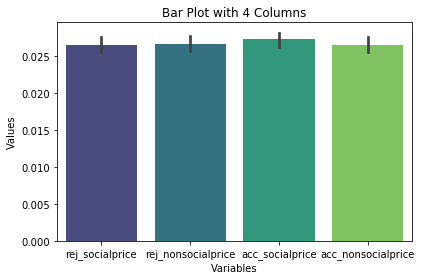

In [68]:

# Prepare data for plotting
fourbarplot_melted = fourbarplot.melt(var_name='ConditionxType', value_name='Price')

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=fourbarplot_melted, x='ConditionxType', y='Price', palette='viridis')

# Customize the plot
plt.title('Bar Plot with 4 Columns')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.tight_layout()

# Show the plot
plt.show()


In [69]:
nonsocialspent_mean = shortformdata['nonsocial_decisionprice_mean'].mean()
socialspent_mean = shortformdata['social_decisionprice_mean'].mean()
                                 
print(nonsocialspent_mean)
print(socialspent_mean)
print()
print(rej['nonsocial_decisionprice_mean'].mean())
print(acc['nonsocial_decisionprice_mean'].mean())
print()
print(rej['social_decisionprice_mean'].mean())
print(acc['social_decisionprice_mean'].mean())



0.026585909229104757
0.026877405096995776

0.026669868504343344
0.02650194995386617

0.026524252446854878
0.027230557747136678


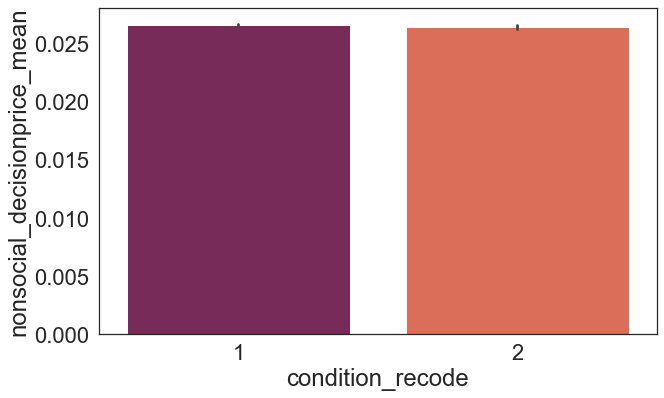

In [70]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
totalspent_nonsocial = sns.barplot(x='condition_recode', y='nonsocial_decisionprice_mean', palette='rocket',data= longformdata) #hue='order')#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
totalspent_nonsocial.figure.savefig('totalspent_nonsocial.png',bbox_inches='tight')

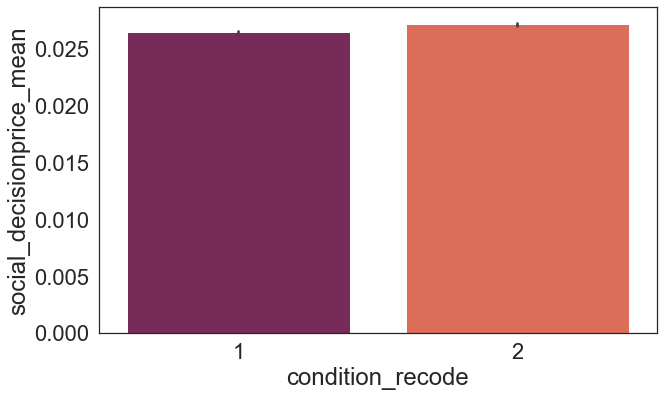

In [71]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
totalspent_social = sns.barplot(x='condition_recode', y='social_decisionprice_mean', palette='rocket',data= longformdata) #hue='order')#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
totalspent_social.figure.savefig('totalspent_social.png',bbox_inches='tight')

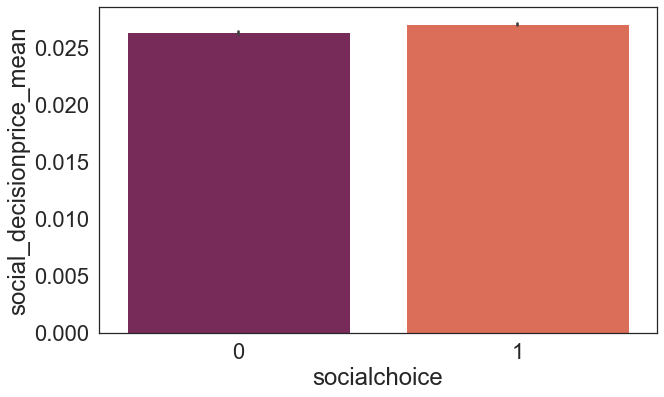

In [72]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
totalspent_social = sns.barplot(x='socialchoice', y='social_decisionprice_mean', palette='rocket',data= longformdata) #hue='order')#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
totalspent_social.figure.savefig('totalspent_social.png',bbox_inches='tight')

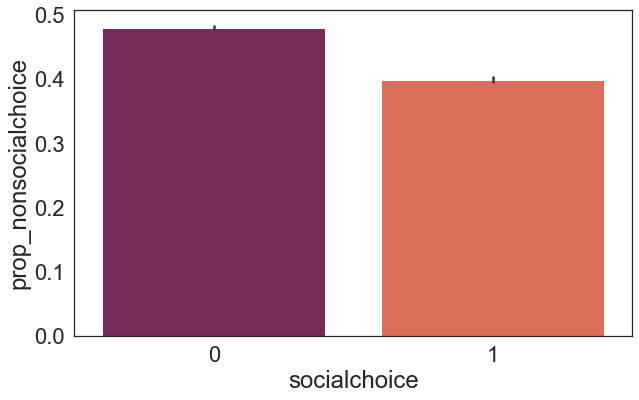

In [73]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
prop_social = sns.barplot(x='socialchoice', y='prop_nonsocialchoice', palette='rocket',data= longformdata) #hue='order')#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
prop_social.figure.savefig('prop_social.png',bbox_inches='tight')

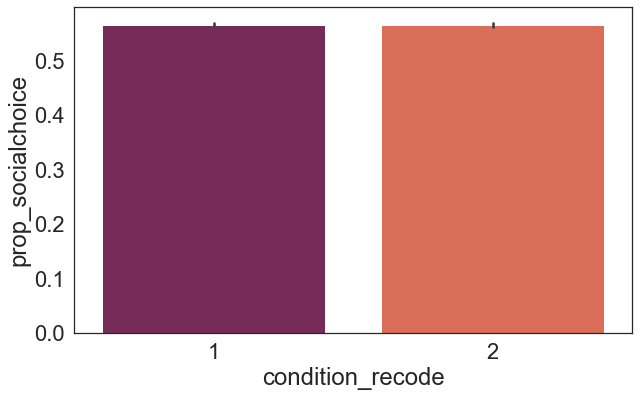

In [74]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
condition_propsocial = sns.barplot(x='condition_recode', y='prop_socialchoice', palette='rocket',data= longformdata) #hue='order')#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
condition_propsocial.figure.savefig('condition_propsocial.png',bbox_inches='tight')

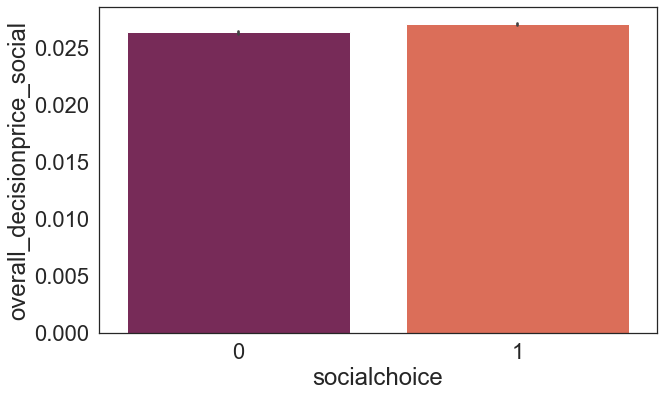

In [75]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
overallspent_social = sns.barplot(x='socialchoice', y='overall_decisionprice_social', palette='rocket',data= longformdata) #hue='order')#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
overallspent_social.figure.savefig('overallspent_social.png',bbox_inches='tight')

,overall_social,overall_nonsocial
0,0.026873,0.026706


<bound method NDFrame._add_numeric_operations.<locals>.mean of 0    0.026873
Name: overall_social, dtype: float64>
<bound method NDFrame._add_numeric_operations.<locals>.mean of 0    0.026706
Name: overall_nonsocial, dtype: float64>


<Figure size 720x432 with 0 Axes>

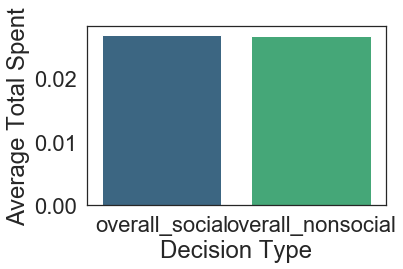

In [76]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')

twobarplot = pd.DataFrame()

twobarplot['overall_social'] = [rej['overall_decisionprice_social'].mean()]
twobarplot['overall_nonsocial'] = [rej['overall_decisionprice_nonsocial'].mean()]

display(twobarplot)


print(twobarplot['overall_social'].mean)
print(twobarplot['overall_nonsocial'].mean)

# Prepare data for plotting
twobarplot_melted = twobarplot.melt(var_name='Decision Type', value_name='Price')

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=twobarplot_melted, x='Decision Type', y='Price', palette='viridis')

# Customize the plot
plt.title('')
plt.ylabel('Average Total Spent')
plt.xlabel('Decision Type')
plt.tight_layout()

# Show the plot
plt.show()

0    0.564264
Name: acc_propsocial, dtype: float64
0    0.565293
Name: rej_propsocial, dtype: float64


<Figure size 720x432 with 0 Axes>

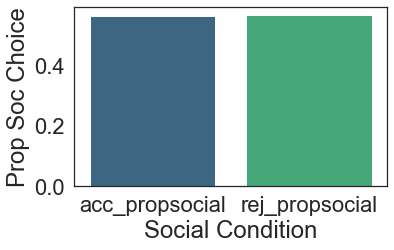

In [77]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')

propsoc_bycondition = pd.DataFrame()

propsoc_bycondition['acc_propsocial'] = [acc['prop_socialchoice'].mean()]
propsoc_bycondition['rej_propsocial'] = [rej['prop_socialchoice'].mean()]

print(propsoc_bycondition['acc_propsocial'])
print(propsoc_bycondition['rej_propsocial'])

# Prepare data for plotting
propsoc_bycondition_melted = propsoc_bycondition.melt(var_name='Social Condition', value_name='Proportion Social Choice')

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=propsoc_bycondition_melted, x='Social Condition', y='Proportion Social Choice', palette='viridis')

# Customize the plot
plt.title('')
plt.ylabel('Prop Soc Choice')
plt.xlabel('Social Condition')
plt.tight_layout()

# Show the plot
plt.show()

0    0.027009
Name: acc_decision_price, dtype: float64
0    0.026751
Name: rej_decision_price, dtype: float64


<Figure size 720x432 with 0 Axes>

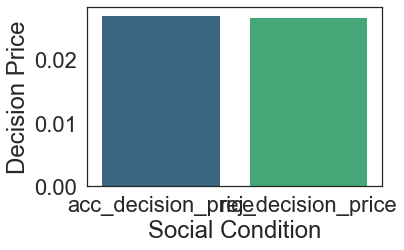

In [78]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')

decisionprice_bycondition = pd.DataFrame()

decisionprice_bycondition['acc_decision_price'] = [acc_long['decision_price'].mean()]
decisionprice_bycondition['rej_decision_price'] = [rej_long['decision_price'].mean()]

print(decisionprice_bycondition['acc_decision_price'])
print(decisionprice_bycondition['rej_decision_price'])

# Prepare data for plotting
decisionprice_bycondition_melted = decisionprice_bycondition.melt(var_name='Social Condition', value_name='Mean Decision Price')

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=decisionprice_bycondition_melted, x='Social Condition', y='Mean Decision Price', palette='viridis')

# Customize the plot
plt.title('')
plt.ylabel('Decision Price')
plt.xlabel('Social Condition')
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')

<Figure size 720x432 with 0 Axes>

In [79]:


prop_difference = pd.DataFrame()
print(prop_difference)



Empty DataFrame
Columns: []
Index: []


<Figure size 720x432 with 0 Axes>

0    0.434783
Name: acc_prop_difference, dtype: float64
0    0.434591
Name: rej_prop_difference, dtype: float64


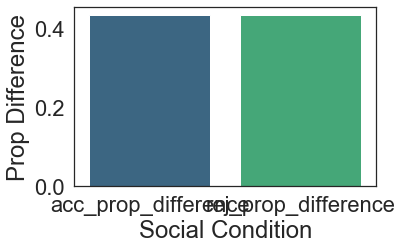

In [80]:
prop_difference['acc_prop_difference'] = [acc_long['prop_difference'].mean()]
prop_difference['rej_prop_difference'] = [rej_long['prop_difference'].mean()]

print(prop_difference['acc_prop_difference'])
print(prop_difference['rej_prop_difference'])

# Prepare data for plotting
prop_difference_melted = prop_difference.melt(var_name='Social Condition', value_name='Prop Difference')

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=prop_difference_melted, x='Social Condition', y='Prop Difference', palette='viridis')

# Customize the plot
plt.title('')
plt.ylabel('Prop Difference')
plt.xlabel('Social Condition')
plt.tight_layout()

# Show the plot
plt.show()

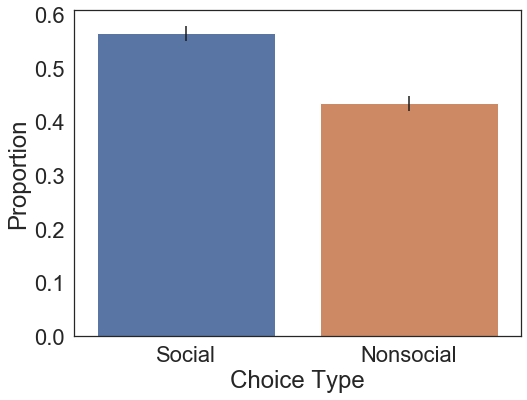

In [17]:
# Compute means
prop_social_mean = rej['prop_socialchoice'].mean()
prop_nonsocial_mean = rej['prop_difference'].mean()

# Compute standard error of the mean (SEM)
prop_social_sem = sem(rej['prop_socialchoice'], nan_policy='omit')  # Ignores NaN values
prop_nonsocial_sem = sem(rej['prop_difference'], nan_policy='omit')

# Create DataFrame
overallprop = pd.DataFrame({
    'Choice Type': ['Social', 'Nonsocial'],
    'Proportion': [prop_social_mean, prop_nonsocial_mean],
    'SEM': [prop_social_sem, prop_nonsocial_sem]  # Adding SEM column
})

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=overallprop, x='Choice Type', y='Proportion', yerr=overallprop['SEM'], capsize=0.2)

# Customizing the plot
plt.title('')
plt.xlabel('Choice Type')
plt.ylabel('Proportion')

plt.savefig("overallproportionchoicetype_plot.png", dpi=300, bbox_inches="tight")  # Save as PNG with high resolution

# Show plot
plt.show()

In [11]:
sem_propsocial = np.std(rej['prop_socialchoice'], ddof=98) / np.sqrt(len(rej['prop_socialchoice']))  # ddof=1 for sample standard deviation
print("Standard Error:", sem)

sem_propnonsocial = np.std(rej['prop_difference'], ddof=98) / np.sqrt(len(rej['prop_difference']))  # ddof=1 for sample standard deviation
print("Standard Error:", sem)

Standard Error: <function sem at 0x7f9f590b7e50>
Standard Error: <function sem at 0x7f9f590b7e50>


Statistic=0.9434, p-value=0.0000
Data is not normally distributed (reject H0)
Statistic=0.9469, p-value=0.0000
Data is not normally distributed (reject H0)


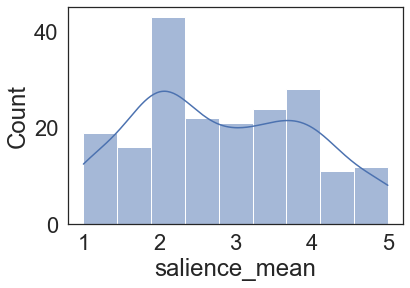

In [84]:
#correlation between stress and salience question, overall and within conditions for all participants
#re-run R models with salience instread of stress question


sns.histplot(data= shortformdata['salience_mean'], kde=True)

from scipy.stats import shapiro

data = [shortformdata['salience_mean']]  # Replace with your dataset
stat, p = shapiro(data)

print(f'Statistic={stat:.4f}, p-value={p:.4f}')
if p > 0.05:
    print("Data appears to be normally distributed (fail to reject H0)")
else:
    print("Data is not normally distributed (reject H0)")
    
data = [shortformdata['stress_mean']]  # Replace with your dataset
stat, p = shapiro(data)

print(f'Statistic={stat:.4f}, p-value={p:.4f}')
if p > 0.05:
    print("Data appears to be normally distributed (fail to reject H0)")
else:
    print("Data is not normally distributed (reject H0)")


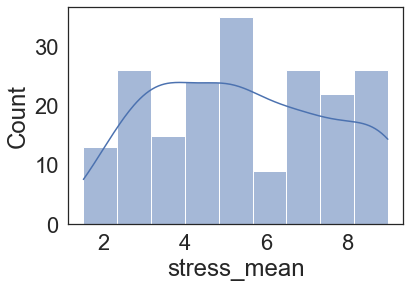

In [85]:
sns.histplot(data= shortformdata['stress_mean'], kde=True)

In [86]:
from scipy.stats import spearmanr


# Compute Spearman's rank correlation
corr, p_value = spearmanr(shortformdata['salience_mean'], shortformdata['stress_mean'])

# Display results
print(f"Spearman's correlation: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant correlation (reject null hypothesis of no correlation)")
else:
    print("No significant correlation (fail to reject null hypothesis)")

Spearman's correlation: 0.3238
P-value: 0.0000
Significant correlation (reject null hypothesis of no correlation)


In [20]:
print(f"Rejection Sample Size: {rej['social_decisionprice_mean'].count()}")
print(f"Acceptance Sample Size: {acc['social_decisionprice_mean'].count()}")


Rejection Sample Size: 98
Acceptance Sample Size: 98


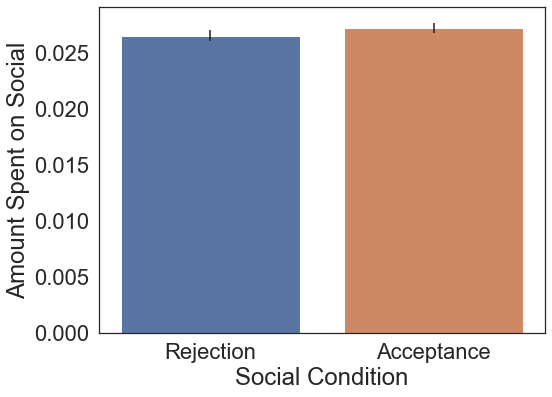

In [24]:
# Compute means
decisionprice_rejsocial_mean = rej['social_decisionprice_mean'].mean()
decisionprice_accsocial_mean = acc['social_decisionprice_mean'].mean()

# Ensure SEM is only computed if there are enough data points
def safe_sem(series):
    return sem(series, nan_policy='omit') if series.count() > 1 else np.nan

# Compute standard error of the mean (SEM)
decisionprice_rejsocial_mean_sem = sem(rej['social_decisionprice_mean'], nan_policy='omit')  # Ignores NaN values
decisionprice_accsocial_mean_sem = sem(acc['social_decisionprice_mean'], nan_policy='omit')

# Create DataFrame
overallprop = pd.DataFrame({
    'Social Condition': ['Rejection', 'Acceptance'],
    'Amount Spent on Social': [decisionprice_rejsocial_mean, decisionprice_accsocial_mean],
    'SEM': [decisionprice_rejsocial_mean_sem, decisionprice_accsocial_mean_sem]  # Adding SEM column
})

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=overallprop, x='Social Condition', y='Amount Spent on Social', yerr=overallprop['SEM'], capsize=0.2)

# Customizing the plot
plt.title('')
plt.xlabel('Social Condition')
plt.ylabel('Amount Spent on Social')

plt.savefig("avgspent_social_rejvacc_plot.png", dpi=300, bbox_inches="tight")  # Save as PNG with high resolution

# Show plot
plt.show()

In [28]:
sorted_shortformdata = shortformdata.sort_values(by='condition_recode')
display(sorted_shortformdata)

,participant,condition_recode,salience_mean,choice,stress_mean,stress_mean.1,rej-acc,ifnegvalue,choicertmean,timebetween,...,overall_decisionprice_nonsocial,decision_price,overall_prop_social_choice,social_price,nonsocial_price,value_diff,social_decisionprice_total,nonsocial_decisionprice_total,prop_nonsocialchoice,prop_difference
0,59d5888d21977e0001d630f3,1,2.0,1.380000,7.0,7.0,-1.0,NaN,1.240000,1.0,...,0.022917,NaN,0.520000,NaN,NaN,NaN,0.60,0.60,0.480000,0.480000
90,6627722f249e56fcefd07b8c,1,3.0,1.520000,3.0,3.0,-1.0,NaN,1.220000,3.0,...,0.022963,NaN,0.454545,NaN,NaN,NaN,0.50,0.60,0.500000,0.500000
88,66202163d9e5dba57c5e831d,1,2.0,1.400000,5.0,5.0,-2.0,NaN,0.840000,4.0,...,0.023137,NaN,0.490000,NaN,NaN,NaN,0.60,0.50,0.480000,0.480000
150,66ada0d8b8ddd62c65d39bfe,1,1.5,1.440000,2.0,2.0,-6.0,NaN,1.280000,2.0,...,0.021163,NaN,0.570000,NaN,NaN,NaN,0.61,0.52,0.460000,0.460000
86,661fee35973b5ff6fa3418ef,1,5.0,1.520000,8.0,8.0,1.5,NaN,1.120000,2.0,...,0.038113,NaN,0.470000,NaN,NaN,NaN,0.93,0.97,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,65d659edd2fb402f9170d123,2,3.0,1.520000,3.0,3.0,0.0,NaN,2.280000,2.0,...,0.025085,NaN,0.410000,NaN,NaN,NaN,0.72,0.57,0.500000,0.500000
69,65d65821b5e4f4fb6de9076c,2,2.5,1.428571,2.0,2.0,0.0,NaN,1.265306,5.0,...,0.026667,NaN,0.484848,NaN,NaN,NaN,0.82,0.69,0.489796,0.489796
67,65c14027646a9bbfa89584c8,2,3.5,1.440000,7.0,7.0,0.0,NaN,2.340000,29.0,...,0.032807,NaN,0.430000,NaN,NaN,NaN,0.70,0.85,0.520000,0.520000
63,659cc63ff59c72a20e2b7688,2,3.0,1.520000,5.5,5.5,-1.0,NaN,0.720000,2.0,...,0.023077,NaN,0.480000,NaN,NaN,NaN,0.50,0.62,0.580000,0.580000


In [31]:
# Create the long-format DataFrame
anova_df = pd.DataFrame({
    'participant': pd.concat([shortformdata['participant'], shortformdata['participant']], ignore_index=True),
    'condition_recode': pd.concat([shortformdata['condition_recode'], shortformdata['condition_recode']], ignore_index=True),
    'decisionprice_total': pd.concat([
        shortformdata['social_decisionprice_total'],
        shortformdata['nonsocial_decisionprice_total']
    ], ignore_index=True),
    'choicetype': [1]*len(shortformdata) + [0]*len(shortformdata)  # 1 for social, 0 for nonsocial
})


                  participant  condition_recode  decisionprice_total  \
0    59d5888d21977e0001d630f3                 1                 0.60   
1    59d5888d21977e0001d630f3                 2                 0.60   
2    5a09ebdf087f2e0001eae39f                 1                 0.85   
3    5a09ebdf087f2e0001eae39f                 2                 0.99   
4    5c5c451500b69200011bb8bf                 1                 0.99   
..                        ...               ...                  ...   
387  6711f493bfc7c4e11953872d                 2                 0.48   
388  671469967e2a4f2e612e3846                 1                 0.68   
389  671469967e2a4f2e612e3846                 2                 0.56   
390  6722ca2b1f3ebd2d544608c3                 1                 0.57   
391  6722ca2b1f3ebd2d544608c3                 2                 0.54   

     choicetype  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
387      

In [40]:
# Assume df looks like this:
# subject_id | condition_recode | social_decisionprice_total | nonsocial_decisionprice_total

# Melt it into long format
anova_df = pd.melt(
    shortformdata,
    id_vars=['participant', 'condition_recode'],
    value_vars=['social_decisionprice_total', 'nonsocial_decisionprice_total'],
    var_name='choice_source',
    value_name='decisionprice_total'
)

# Recode choicetype from column names
anova_df['choicetype'] = anova_df['choice_source'].map({
    'social_decisionprice_total': 1,
    'nonsocial_decisionprice_total': 0
})

# Drop the now-unneeded column
anova_df = anova_df.drop(columns='choice_source')

# Optional: sort for readability
#long_df = long_df.sort_values(by=['subject_id', 'condition_recode', 'choicetype']).reset_index(drop=True)


In [42]:
display(anova_df)

,participant,condition_recode,decisionprice_total,choicetype
0,59d5888d21977e0001d630f3,1,0.60,1
1,59d5888d21977e0001d630f3,2,0.60,1
2,5a09ebdf087f2e0001eae39f,1,0.85,1
3,5a09ebdf087f2e0001eae39f,2,0.99,1
4,5c5c451500b69200011bb8bf,1,0.99,1
...,...,...,...,...
387,6711f493bfc7c4e11953872d,2,0.48,0
388,671469967e2a4f2e612e3846,1,0.68,0
389,671469967e2a4f2e612e3846,2,0.56,0
390,6722ca2b1f3ebd2d544608c3,1,0.57,0


In [43]:
print(shortformdata.head())
print(shortformdata.columns.tolist())
print(shortformdata.groupby('participant').size())
print(shortformdata.groupby(['participant', 'condition_recode']).size())


                participant  condition_recode  salience_mean  choice  \
0  59d5888d21977e0001d630f3                 1            2.0    1.38   
1  59d5888d21977e0001d630f3                 2            3.5    1.42   
2  5a09ebdf087f2e0001eae39f                 1            2.5    1.58   
3  5a09ebdf087f2e0001eae39f                 2            3.5    1.52   
4  5c5c451500b69200011bb8bf                 1            1.5    1.34   

   stress_mean  stress_mean.1  rej-acc  ifnegvalue  choicertmean  timebetween  \
0          7.0            7.0     -1.0         NaN          1.24          1.0   
1          8.0            8.0     -1.0         NaN          0.88          1.0   
2          2.0            2.0     -1.0         NaN          1.98          4.0   
3          3.0            3.0     -1.0         NaN          1.26          4.0   
4          5.0            5.0      1.5         NaN          1.22          3.0   

   ...  overall_decisionprice_nonsocial decision_price  \
0  ...                

In [45]:
long_df = pd.melt(
    shortformdata,
    id_vars=['participant', 'condition_recode'],
    value_vars=['social_decisionprice_total', 'nonsocial_decisionprice_total'],
    var_name='choice_source',
    value_name='decisionprice_total'
)

# Map the choicetype based on column name
long_df['choicetype'] = long_df['choice_source'].map({
    'social_decisionprice_total': 1,
    'nonsocial_decisionprice_total': 0
})

# Drop the helper column now that we have choicetype
long_df = long_df.drop(columns='choice_source')

# Sort for clarity
long_df = long_df.sort_values(by=['participant', 'condition_recode', 'choicetype']).reset_index(drop=True)

print(long_df.head(10))


                participant  condition_recode  decisionprice_total  choicetype
0  59d5888d21977e0001d630f3                 1                 0.60           0
1  59d5888d21977e0001d630f3                 1                 0.60           1
2  59d5888d21977e0001d630f3                 2                 0.50           0
3  59d5888d21977e0001d630f3                 2                 0.60           1
4  5a09ebdf087f2e0001eae39f                 1                 0.67           0
5  5a09ebdf087f2e0001eae39f                 1                 0.85           1
6  5a09ebdf087f2e0001eae39f                 2                 0.52           0
7  5a09ebdf087f2e0001eae39f                 2                 0.99           1
8  5c5c451500b69200011bb8bf                 1                 0.62           0
9  5c5c451500b69200011bb8bf                 1                 0.99           1


In [46]:
# Run 2x2 repeated measures ANOVA
anova_results = pg.rm_anova(
    dv='decisionprice_total',
    within=['condition_recode', 'choicetype'],
    subject='participant',
    data=long_df,
    detailed=True
)

print(anova_results)

                          Source        SS  ddof1  ddof2        MS          F  \
0               condition_recode  0.002450      1     97  0.002450   0.391419   
1                     choicetype  3.265838      1     97  3.265838  21.305203   
2  condition_recode * choicetype  0.040004      1     97  0.040004   1.649200   

      p-unc  p-GG-corr       ng2  eps  
0  0.533024   0.533024  0.000110  1.0  
1  0.000012   0.000012  0.127760  1.0  
2  0.202127   0.202127  0.001791  1.0  
